In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [185]:
data= pd.read_csv("diabetes.csv")

<h1>Data Exploration</h1>

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [187]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
print(data.duplicated().sum())
print(data.isna().any(axis=1).sum())

0
0


<Axes: >

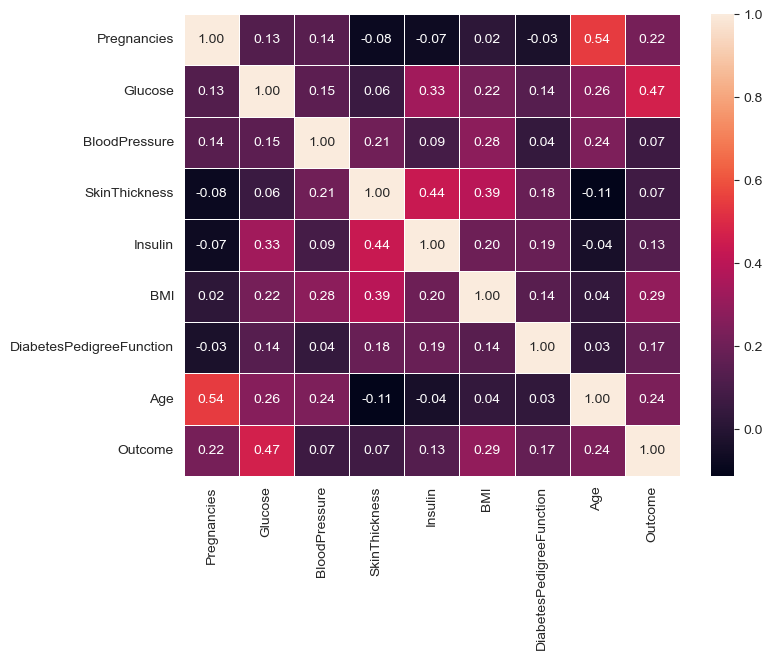

In [190]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,fmt="0.2f",linewidths=0.7)

<Axes: xlabel='Outcome', ylabel='count'>

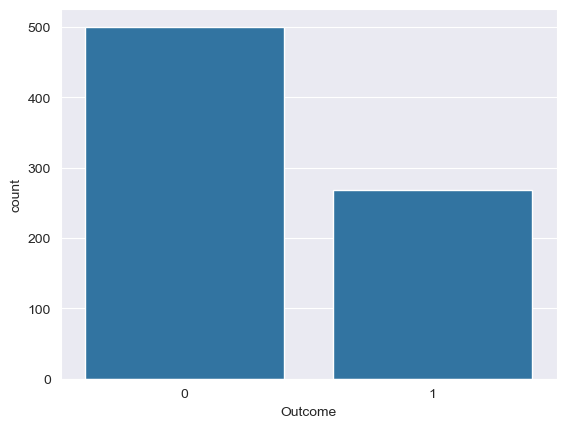

In [191]:
sns.countplot(x=data.Outcome)

<h1>Model<h1>

In [192]:
train_x,test_x,train_y,test_y=train_test_split(data.drop("Outcome",axis=1),data["Outcome"],test_size=0.2)
score=[]

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

accuracy : 0.7922077922077922 recall:  0.6181818181818182 precision:  0.7555555555555555


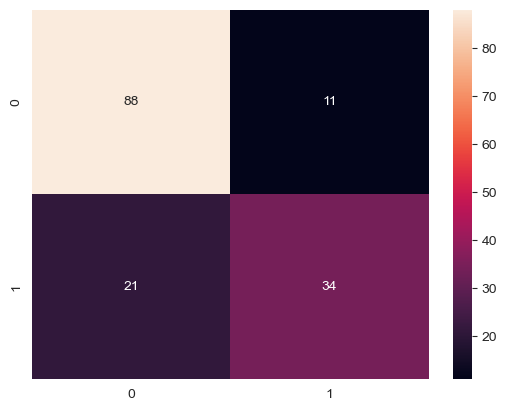

In [193]:
reg = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)
result = reg.fit(train_x,train_y)
predict = result.predict(test_x)
print("RandomForestClassifier")

print(classification_report(test_y,predict))
sns.heatmap(confusion_matrix(test_y,predict),annot=True)
print("accuracy :",accuracy_score(test_y,predict),"recall: ",recall_score(test_y,predict),"precision: ",precision_score(test_y,predict))
score.append(["RandomForestClassifier",accuracy_score(test_y,predict),recall_score(test_y,predict),precision_score(test_y,predict)])

LogisticRegression
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        99
           1       0.87      0.60      0.71        55

    accuracy                           0.82       154
   macro avg       0.84      0.77      0.79       154
weighted avg       0.83      0.82      0.82       154

accuracy : 0.8246753246753247 recall:  0.6 precision:  0.868421052631579


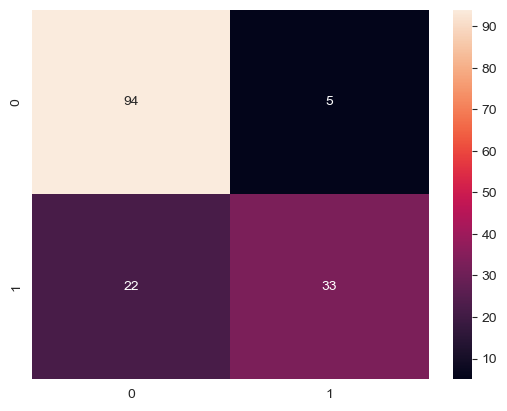

In [194]:
reg = LogisticRegression(max_iter=1000,random_state=0)
result = reg.fit(train_x,train_y)
predict = result.predict(test_x)
print("LogisticRegression")

print(classification_report(test_y,predict))
sns.heatmap(confusion_matrix(test_y,predict),annot=True)
print("accuracy :",accuracy_score(test_y,predict),"recall: ",recall_score(test_y,predict),"precision: ",precision_score(test_y,predict))
score.append(["LogisticRegression",accuracy_score(test_y,predict),recall_score(test_y,predict),precision_score(test_y,predict)])

SVC
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        99
           1       0.83      0.62      0.71        55

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154

accuracy : 0.8181818181818182 recall:  0.6181818181818182 precision:  0.8292682926829268


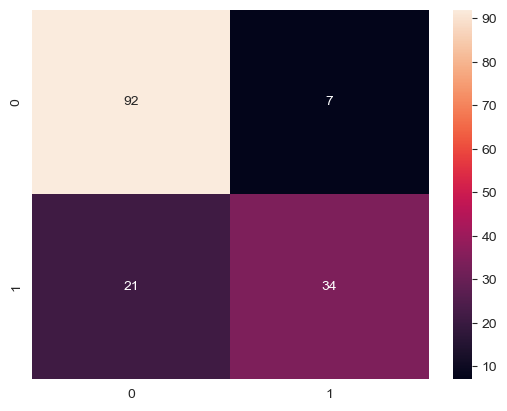

In [195]:
reg = SVC(kernel='linear',random_state=0)
result = reg.fit(train_x,train_y)
predict = result.predict(test_x)

print("SVC")
print(classification_report(test_y,predict))
sns.heatmap(confusion_matrix(test_y,predict),annot=True)
print("accuracy :",accuracy_score(test_y,predict),"recall: ",recall_score(test_y,predict),"precision: ",precision_score(test_y,predict))
score.append(["SVC",accuracy_score(test_y,predict),recall_score(test_y,predict),precision_score(test_y,predict)])


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.58      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

accuracy : 0.6948051948051948 recall:  0.5454545454545454 precision:  0.5769230769230769


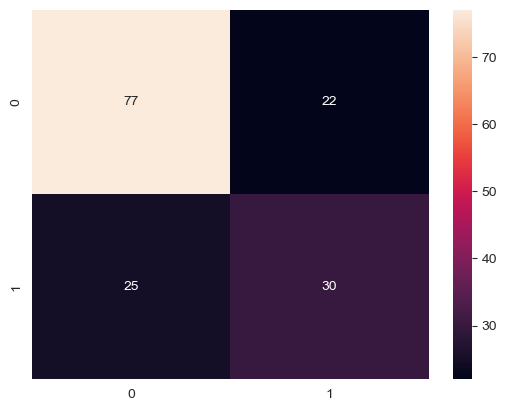

In [196]:
reg = DecisionTreeClassifier()
result = reg.fit(train_x,train_y)
predict = result.predict(test_x)
print("DecisionTreeClassifier")

print(classification_report(test_y,predict))
sns.heatmap(confusion_matrix(test_y,predict),annot=True)
print("accuracy :",accuracy_score(test_y,predict),"recall: ",recall_score(test_y,predict),"precision: ",precision_score(test_y,predict))
score.append(["DecisionTreeClassifier",accuracy_score(test_y,predict),recall_score(test_y,predict),precision_score(test_y,predict)])


GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

accuracy : 0.7922077922077922 recall:  0.6181818181818182 precision:  0.7555555555555555


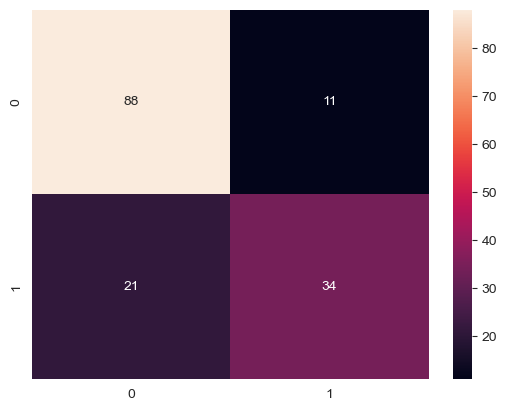

In [197]:
reg = GradientBoostingClassifier()
result = reg.fit(train_x,train_y)
predict = result.predict(test_x)
print("GradientBoostingClassifier")

print(classification_report(test_y,predict))
sns.heatmap(confusion_matrix(test_y,predict),annot=True)
print("accuracy :",accuracy_score(test_y,predict),"recall: ",recall_score(test_y,predict),"precision: ",precision_score(test_y,predict))
score.append(["GradientBoostingClassifier",accuracy_score(test_y,predict),recall_score(test_y,predict),precision_score(test_y,predict)])


GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154

accuracy : 0.7987012987012987 recall:  0.6727272727272727 precision:  0.74


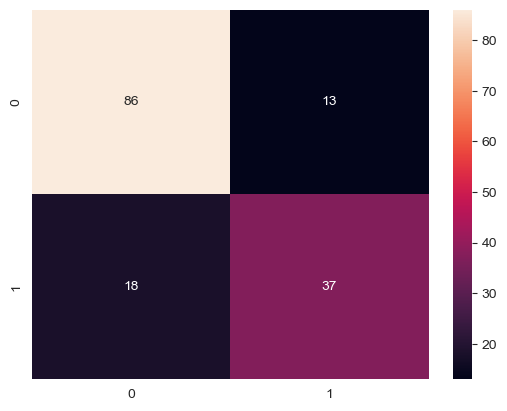

In [198]:
reg = GaussianNB()
result = reg.fit(train_x,train_y)
predict = result.predict(test_x)
print("GaussianNB")

print(classification_report(test_y,predict))
sns.heatmap(confusion_matrix(test_y,predict),annot=True)
print("accuracy :",accuracy_score(test_y,predict),"recall: ",recall_score(test_y,predict),"precision: ",precision_score(test_y,predict))
score.append(["GaussianNB",accuracy_score(test_y,predict),recall_score(test_y,predict),precision_score(test_y,predict)])


In [199]:
info = pd.DataFrame(columns=["Algorithm","Accuracy","Recall","Precision"],data=score)
info

,Algorithm,Accuracy,Recall,Precision
0,RandomForestClassifier,0.792208,0.618182,0.755556
1,LogisticRegression,0.824675,0.600000,0.868421
2,SVC,0.818182,0.618182,0.829268
3,DecisionTreeClassifier,0.694805,0.545455,0.576923
4,GradientBoostingClassifier,0.792208,0.618182,0.755556
5,GaussianNB,0.798701,0.672727,0.740000


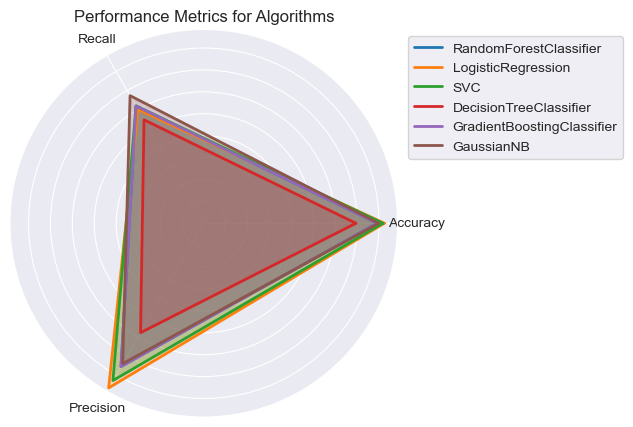

In [200]:
def radar_chart(df):
    num_vars = len(df.columns) - 1
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(5, 10), subplot_kw=dict(polar=True))
    for i, row in df.iterrows():
        values = row[1:].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=row['Algorithm'])
        ax.fill(angles, values, alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(df.columns[1:])
    plt.title('Performance Metrics for Algorithms')
    plt.legend(bbox_to_anchor=(1.6,1))
    plt.show()

radar_chart(info)

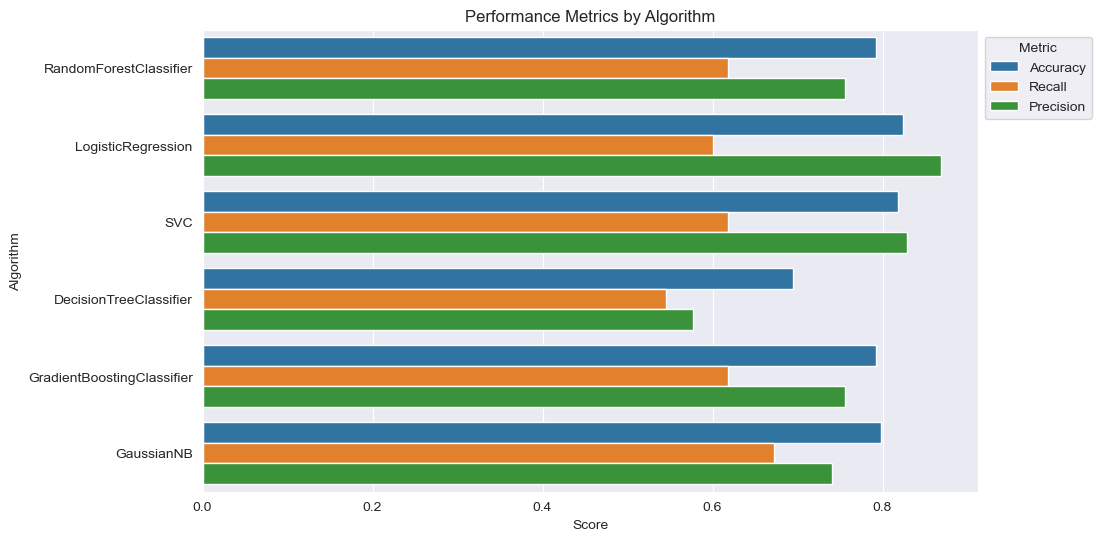

In [201]:

df_melted = info.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, y='Algorithm', x='Score', hue='Metric')
plt.title('Performance Metrics by Algorithm')
plt.xlabel('Score')
plt.ylabel('Algorithm')
plt.legend(title='Metric',bbox_to_anchor=(1,1))
plt.show()

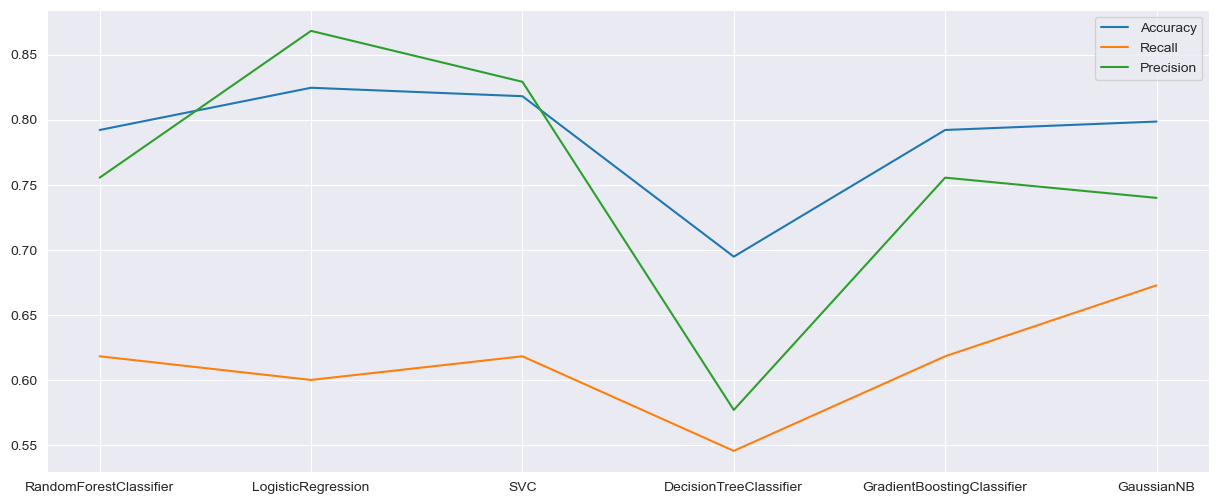

In [202]:
plt.figure(figsize=(15,6))
plt.plot(info["Algorithm"],info["Accuracy"])
plt.plot(info["Algorithm"],info["Recall"])
plt.plot(info["Algorithm"],info["Precision"])
plt.legend(info.drop("Algorithm",axis=1).columns,bbox_to_anchor=(1,1))